In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
from matplotlib_venn import venn2

The data for this project was obtained from *OpenSantions* from the url: https://www.opensanctions.org/

This source is "a global database of persons and companies of political, criminal, or economic interest. It combines the most important sanctions lists, databases of politically exposed persons, and other public information into a single, easy-to-access dataset."

The following dataset shows top twenty nationalities (by country code) of the sanctioned persons, with Great Britain being the high outlier:

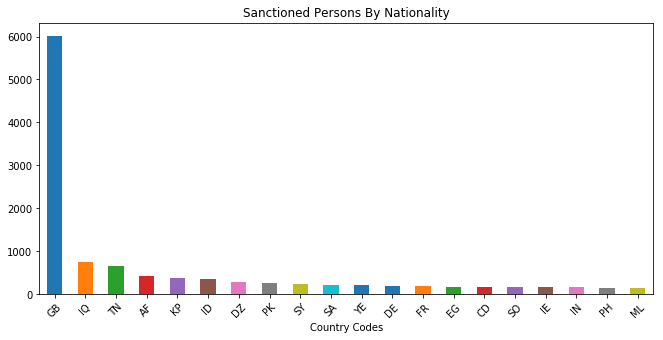

In [2]:
nationalities = pd.read_csv('C:\Inna\'s files\data\Sanctions\countries.csv')
#The original csv file "nationalities.csv" wouldn't open under that name: it gave me an error File not Found.

nationalities.country_code.value_counts().head(20).plot(kind='bar', figsize=(11,5))
plt.xlabel('Country Codes')
plt.xticks(rotation=45)
plt.title('Sanctioned Persons By Nationality')

plt.show()

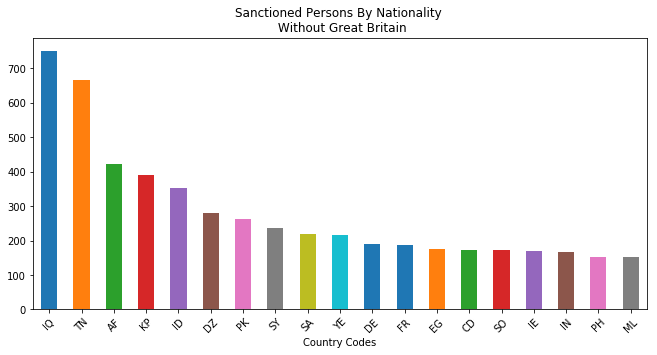

In [3]:
nationalities.country_code.value_counts().head(20)[1:21].plot(kind='bar', figsize=(11,5))
plt.xlabel('Country Codes')
plt.xticks(rotation=45)
plt.title('Sanctioned Persons By Nationality \n Without Great Britain')
plt.show()

The next dataset shows top twenty **birthplaces** of the sanctioned persons. 

The most interesting finding from this dataset is that Great Britain, which is by far the most common nationality of the santioned persons, does not make it top twenty birthplaces. The high outlier and the most frequent birthplace is Afghanistan. Great Britain appears to be the top destination for persons who end up on the sanctions lists.

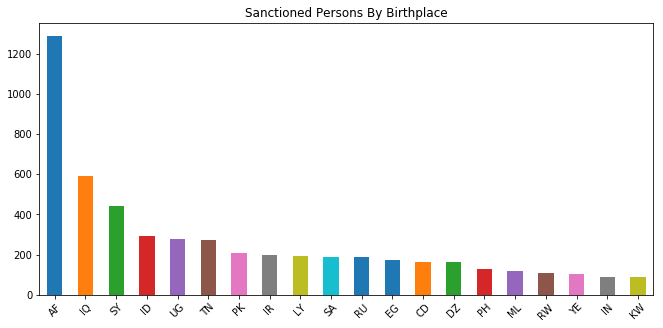

In [4]:
birthplaces = pd.read_csv('C:\Inna\'s files\data\Sanctions\where.csv')
#The original file downladed from the santions.org is called birthplaces.csv but this name gives me an error "File not found"

birthplaces.country_code.value_counts().head(20).plot(kind='bar', figsize=(11,5))
plt.xticks(rotation=45)
plt.title('Sanctioned Persons By Birthplace')

plt.show()

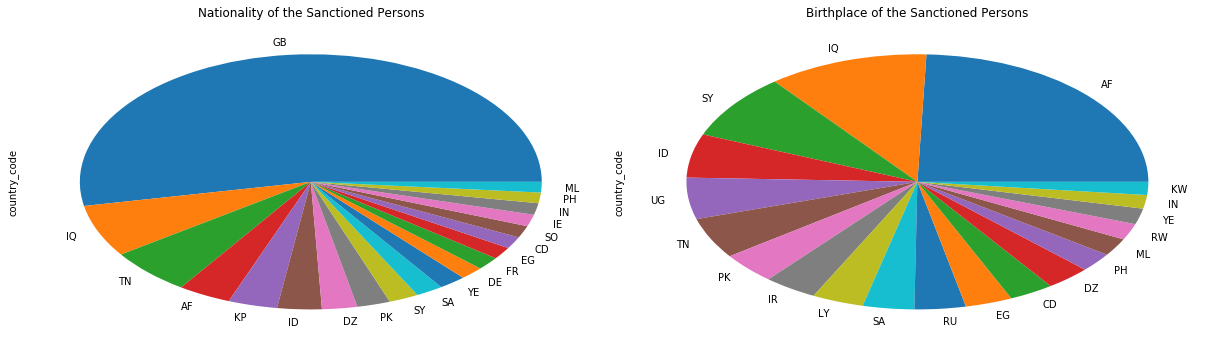

In [5]:
plt.figure(figsize=(17,5))

plt.subplot (1, 2, 1)
nationalities.country_code.value_counts().head(20).plot(kind='pie')
plt.title('Nationality of the Sanctioned Persons')

plt.subplot (1, 2, 2)
birthplaces.country_code.value_counts().head(20).plot(kind='pie')
plt.title('Birthplace of the Sanctioned Persons')

plt.tight_layout()
plt.show()

The following boxplots can help us identify that the data have clear high outliers.

c:\users\owner\appdata\local\programs\python\python36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


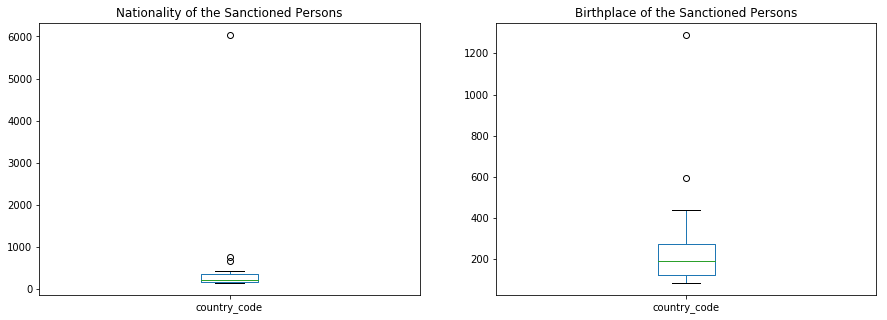

In [6]:
plt.figure(figsize=(15,5))
plt.subplot (1, 2, 1)
plt.subplot (1, 2, 1)
nationalities.country_code.value_counts().head(20).plot(kind='box')
plt.title('Nationality of the Sanctioned Persons')

plt.subplot (1, 2, 2)
birthplaces.country_code.value_counts().head(20).plot(kind='box')
plt.title('Birthplace of the Sanctioned Persons')

plt.show()

We can proceed to compare top twenty most frequent first and second names. An interesting insight we get from the top twenty second names is that women are present among sanctioned persons: **Ann** as a second name is top 15.  

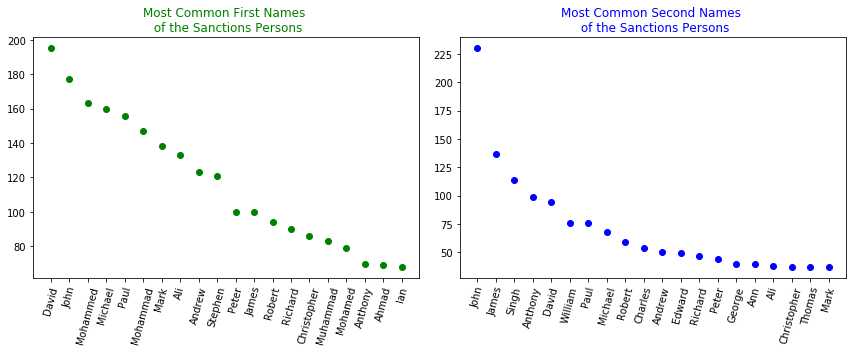

In [7]:
names = pd.read_csv('C:\Inna\'s files\data\Sanctions\entities.csv')
most_common = pd.DataFrame(names.first_name.value_counts().head(20)) 
most_common = most_common.reset_index()
most_common.columns = ['first_name','frequency']

plt.figure(figsize=(12,5))

plt.subplot (1, 2, 1)
plt.scatter(x = most_common.first_name, y = most_common.frequency, color = 'green')
plt.title('Most Common First Names \n of the Sanctions Persons', color='green')
plt.xticks(rotation=75)

plt.subplot (1, 2, 2)
names = pd.read_csv('C:\Inna\'s files\data\Sanctions\entities.csv')
most_common_new = pd.DataFrame(names.second_name.value_counts().head(20)) #.plot(kind='bar', figsize=(10,5))
most_common_new = most_common_new.reset_index()
most_common_new.columns = ['second_name','frequency']

plt.scatter(x = most_common_new.second_name, y = most_common_new.frequency, color = 'blue')
plt.title('Most Common Second Names \n of the Sanctions Persons', color='blue')
plt.xticks(rotation=75)

plt.tight_layout()
plt.show()

Since the first and second names seem to share some items, it is useful to create a venn diagram to see exactly how many names they share. The Venn diagram shows that the two groups have **thirteen** names in common whereas each group has seven unique names.

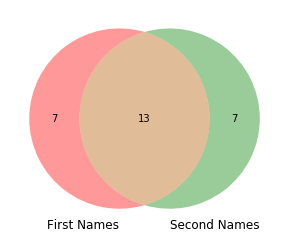

In [8]:
v=venn2([set(most_common.iloc[:, 0]), set(most_common_new.iloc[:, 0])])
v.get_label_by_id('A').set_text('First Names')
v.get_label_by_id('B').set_text('Second Names')

The most frequent last name is **Kim**  which could be correlated with presence of North Korea on both top nationalities and top birthplaces of the sanctioned persons. The second most frequent last name is **Al-Tikriti**. Small research into the history of this last name shows that it can be traced back to people who originate from the Iraqi town of Tikrit. 

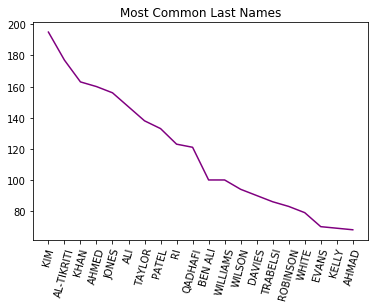

In [9]:
names = pd.read_csv('C:\Inna\'s files\data\Sanctions\entities.csv')
#most_common_last = pd.DataFrame(names.last_name.value_counts().head(20))
most_common_last = pd.DataFrame(names.last_name.str.upper().value_counts().head(20))                         
most_common_last = most_common_last.reset_index()
most_common_last.columns = ['last_name','frequency']


plt.plot(most_common_last.last_name, most_common.frequency, color='purple')
plt.title('Most Common Last Names')
plt.xticks(rotation=75)
plt.show()

In [28]:
only_GB = nationalities.loc[lambda df: nationalities['country_code'] == 'GB', :]
only_GB = only_GB.reset_index()
british_nationals = only_GB.loc[:,['entity_id', 'country_code']]
british_nationals.columns = ['entity_id', 'country_code']

updated_birthplaces = birthplaces.loc[:, ['entity_id', 'country_code']]


                                              entity_id country_code
0                               un-sc-sanctions.2760967           GB
1                               un-sc-sanctions.6908609           GB
2                               un-sc-sanctions.6908475           GB
3                                un-sc-sanctions.112166           GB
4                               un-sc-sanctions.6908476           GB
5                               un-sc-sanctions.6908608           GB
6                               un-sc-sanctions.6908473           GB
7                               un-sc-sanctions.6908484           GB
8                               un-sc-sanctions.6908474           GB
9     worldpresidentsdb.d29870921e503d6efd4f204bd885...           GB
10    us-cia-world-leaders.b70f37a5a25476d73ac68f8ae...           GB
11    us-cia-world-leaders.4d7993e8a5d296c0e74339a54...           GB
12    us-cia-world-leaders.ef6f69f7e7001cce6a51c448b...           GB
13    us-cia-world-leaders.e387457